# 09. 모델튜닝 & 과적합의 위험성

- 예측을 위해 모델을 사용하려면 해당 모델의 파라미터를 추정해야함
- 파라미터 중 일부는 훈련 데이터에서 직접 추정할 수 있지만, 하이퍼 파라미터는 훈련 데이터에서 직접 찾을 수 없음. 
- 이는 모델에 중대한 영향을 미치지만 데이터에서 직접 추정할 수 없는 알려지지 않은 구조적 또는 기타 종류의 값

<br>

In [3]:
library(tidyverse)
library(tidymodels)
ggplot2::theme_set(theme_bw())
tidymodels_prefer()
library(ggforce)

<br>

## 09.01 모델 파라미터
- 일반 선형회귀에는 두 개의 파라미터 $\beta_0, \beta_1$이 존재하며, 
    
    **데이터에서 직접 파라미터를 추정 할 수 있음**

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\hat \beta_1 = \frac{\sum_i (y_i-\bar{y})(x_i-\bar{x})}{\sum_i(x_i-\bar{x})^2}$$

$$\hat \beta_0 = \bar{y}-\hat \beta_1 \bar{x}.$$

<br>

- KNN모델의 경우, 예측값은 

$$\hat y = \frac{1}{K}\sum_{\ell = 1}^K x_\ell^*$$ 

- $K$는 이웃의 수이고, $x_\ell^*$는 훈련데이터에서 $x_0$과 가장 가까운 $K$개의 값들
    
    $\rightarrow$ **모델은 방정식으로 정의되지 않음**
    
    - 이웃의 수 $K$는 모델에 큰 영향을 미치며, 클래스 경계의 유연성을 제어
        
        $K$값이 매우 작으면 경계는 매우 정교해지지만, 값이 크면 매우 매끄러울 수 있음
        
    $\rightarrow$ **$K$는 KNN모델의 하이퍼 파라미터**


<br>

## 09.02. 서로 다른 모델의 하이퍼 파라미터
#### 머신러닝에서 하이파 파라미터 튜닝

<br>

1. 부스팅
- 부스팅은 일련의 기본 모델을 결합하는 앙상블 방법으로, 각 기본 모델은 순차적으로 생성되고 이전 모델에 종속. 
- 부스팅 반복 횟수는 일반적으로 최적화가 필요한 중요한 튜닝 파라미터

<br>

2. 신경망
- 고전적인 단일 계층 인공 신경망(일명 다층 퍼셉트론)에서는 예측 변수가 두 개 이상의 은닉층을 사용하여 결합
- 은닉층은 활성화 함수 (일반적으로 시그모이드와 같은 비선형 함수)에 캡처된 예측 변수의 선형 조합
- 은닉층은 출력층에 연결되며, 회귀 모델에는 하나의 출력층이 사용되며 분류에는 여러 출력층이 필요
- 은닉층의 수와 활성화 함수 유형은 중요한 튜닝 파라미터

<br>

3. 경사하강법
- 경사하강법은 올바른 최적화 매개변수를 찾아 개선됨. 이러한 하이퍼 파라미터의 예로는 학습률, 모멘텀, 최적화 반복/시대 수 등이 존재 ( Goodfellow, Bengio 및 Courville 2016 ). 
- 신경망과 일부 앙상블 모델은 경사하강법을 사용하여 모델 매개변수를 추정
- 경사하강법과 관련된 파라미터는 튜닝이 필요한 경우가 많음

<br>

#### 전처리 단계에서의 하이퍼 파라미터 튜닝

1. PCA & PLS
- PCA 또는 PLS라 불리는 지도학습에서 설명변수는 다중공선성과 관련된 더 나은 성분을 가진 새로운 변수로 대체되며, 성분의 수는 튜닝 파라미터

2. 결측값 대체
- 하나 이상의 설명변수 값을 사용하여 결측값을 추정
- 효과적인 결측값 대체법은 KNN이며, K는 중요한 튜닝 파라미터

<br>

#### 통계 모델에서의 하이퍼 파라미터 튜닝

1. 이진분류 모델
- 이진변수에 대한 모델에서는 로짓 연결함수가 일반적으로 사용 (로지스틱, 프로빗, 로그-로그 등)
- 연결함수의 종류는 중요한 튜닝 파라미터

<br>

#### 하이퍼 파라미터 튜닝이 불필요함
1. 베이지안 분석에 필요한 사전 분포
- 사전분포는 증거나 데이터를 고려하기 전에, 분포에 대한 분석가의 믿음을 요약
- 이전의 베이지안 ANOVA 모델에서, 회귀 매개변수에 대한 사전 값이 무엇인지 명확하지 않았으며, 꼬리가 더 두꺼우므로 사전 분포에 대해 자유도가 1인 t-분포를 선택함
    
    $\rightarrow$ **이는 불확실성을 반영한 것이며, 사전분포는 최적화의 대상이 되어서는 안 됨**
    
- **하이퍼 파라미터는 일반적으로 성능을 위해 최적화되어야 함**

<br>

2. 랜덤포레스트/배깅
- 랜덤 포레스트 또는 배깅 모델의 나무 수는 결과의 수치적 안정성을 보장할 만큼 충분히 크게 선택되어야 함
- 값이 신뢰할 수 있는 결과를 생성할 만큼 충분히 큰 경우에는, 튜닝을 통해 성능을 향상시킬 수 없음
- 랜덤 포레스트의 경우 이 값은 일반적으로 수천 개이지만 배깅에 필요한 나무 수는 약 50~100개


<br>

## 09.02. 튜닝의 대상
- 하이퍼 파라미터 튜닝에서의 모델 평가는, 모델의 종류와 목적에 따라 상이
- 튜닝 파라미터의 통계적 속성이 다루기 쉬운 경우, 공통 통계 속성을 목적 함수로 사용
    - **예를 들어 이진 로지스틱 회귀 분석의 경우, 가능도 또는 정보 기준(IC)을 최대화하여 연결 함수를 선택**
        
        **그러나 이러한 통계적 속성은 정확도 지향 속성을 사용하여 얻은 결과와 일치하지 않을 수 있음**

> **과적합으로 가능도를 낮추면, 실제로 오분류율은 높아질 수 있음. 비록 직관에 반할 수도 있지만, 이는 모순이 아님**
>
> $\rightarrow$ **가능도와 오분류율은 서로 다른 다양한 지표를 측정**

<br>

#### 2개의 클래스와 593개의 관측값으로 구성된 데이터
- 로지스틱 회귀 (GLM)을 사용
    
    $\rightarrow$ 로짓변환을 사용, 샘플이 Class 1인 로그 확률을 활용
    
$$\log\left(\frac{\pi}{1 - \pi}\right) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$$

- 프로빗 모델 활용 시 ($\Phi$는 표준정규분포의 누적분포)
$$\Phi^{-1}(\pi) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$$

- 로그-로그 모델 활용 시
$$\log(-\log(1-\pi)) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$$

In [15]:
data(two_class_dat)

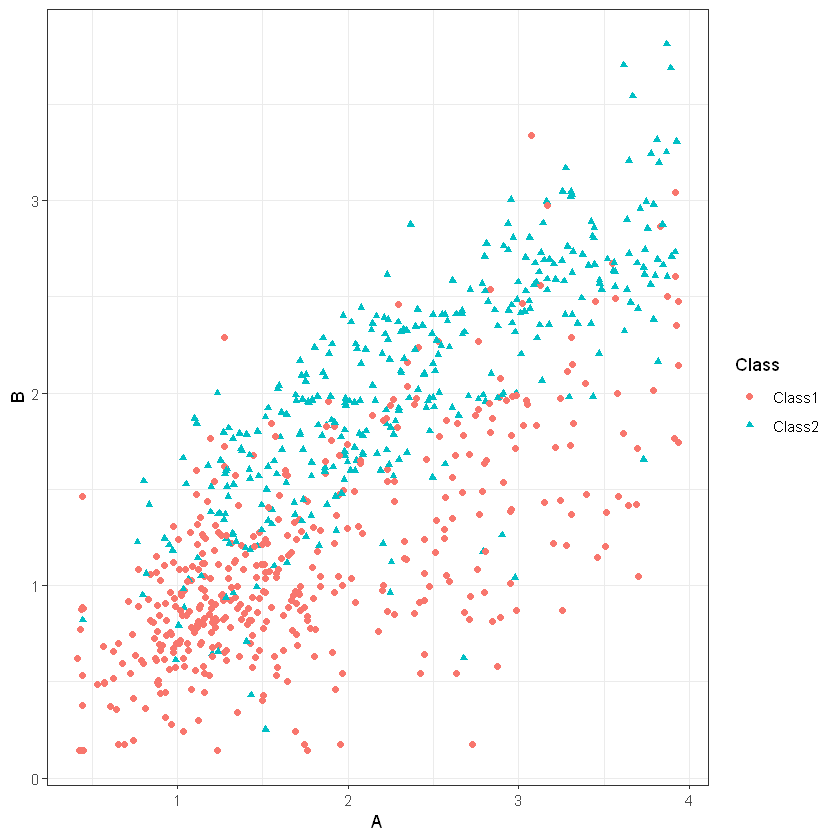

In [14]:
ggplot(two_class_dat) +
    geom_point(aes(A, B, colour=Class, shape=Class))

In [16]:
set.seed(91)
split <- initial_split(two_class_dat)
training_set <- training(split)
testing_set  <-  testing(split)

data_grid <- crossing(A = seq(0.4, 4, length = 200), 
                      B = seq(.14, 3.9, length = 200))

<br>

- **연결함수 선택에 있어 통계적인 접근 방식은, 각 모델에 대한 로그 가능도를 계산하고 가장 큰 값을 갖는 모델을 결정**

    $\rightarrow$ 로지스틱 모델이 가장 좋은 통계적 특성 (가장 높은 로그 가능도)를 가짐
    


In [18]:
llhood <- function(...) {
    logistic_reg() %>% 
        set_engine("glm", ...) %>% 
        fit(Class ~ ., data = training_set) %>% 
        glance() %>% 
        select(logLik)
}

In [19]:
bind_rows(
    llhood(),
    llhood(family = binomial(link = "probit")),
    llhood(family = binomial(link = "cloglog"))
) %>% 
    mutate(link = c("logit", "probit", "c-log-log"))  %>% 
    arrange(desc(logLik))

logLik,link
<dbl>,<chr>
-257.5885,logit
-261.6862,probit
-269.7402,c-log-log


- **로그 가능도를 통한 연결함수 선택은, 그 의미에 대해서 이해하기 어려움**

    $\rightarrow$ **통계량을 리샘플링하고, 성능 추정에 사용된 데이터에서 모델링 데이터를 분리 하는 것**
    
- 반복적인 10-fold 교차검증을 통해서, 음의 로그 가능도 측정

In [20]:
set.seed(1201)
rs <- vfold_cv(training_set, repeats = 10)

In [22]:
lloss <- function(...) {
    perf_meas <- metric_set(roc_auc, mn_log_loss)

    logistic_reg() %>% 
        set_engine("glm", ...) %>% 
        fit_resamples(Class ~ A + B, rs, metrics = perf_meas) %>% 
        collect_metrics(summarize = FALSE) %>%
        select(id, id2, .metric, .estimate)
}

In [29]:
resampled_res <- bind_rows(
    lloss() %>% mutate(model = "logistic"),
    lloss(family = binomial(link = "probit"))  %>% mutate(model = "probit"),
    lloss(family = binomial(link = "cloglog")) %>% mutate(model = "c-log-log")     
) %>%
    mutate(`.estimate` = ifelse(`.metric` == "mn_log_loss", -1 * `.estimate`, `.estimate`)) %>% 
    group_by(model, .metric) %>% 
    summarize(
        mean = mean(.estimate, na.rm = TRUE),
        std_err = sd(.estimate, na.rm = TRUE) / sqrt(n()), 
        .groups = "drop"
    )

→ A | warning: glm.fit: fitted probabilities numerically 0 or 1 occurred

There were issues with some computations   A: x1
There were issues with some computations   A: x1




- 세 가지 다른 연결 함수별, 리샘플링된 이항 로그 가능도에 대한 평균과 90% 신뢰 구간

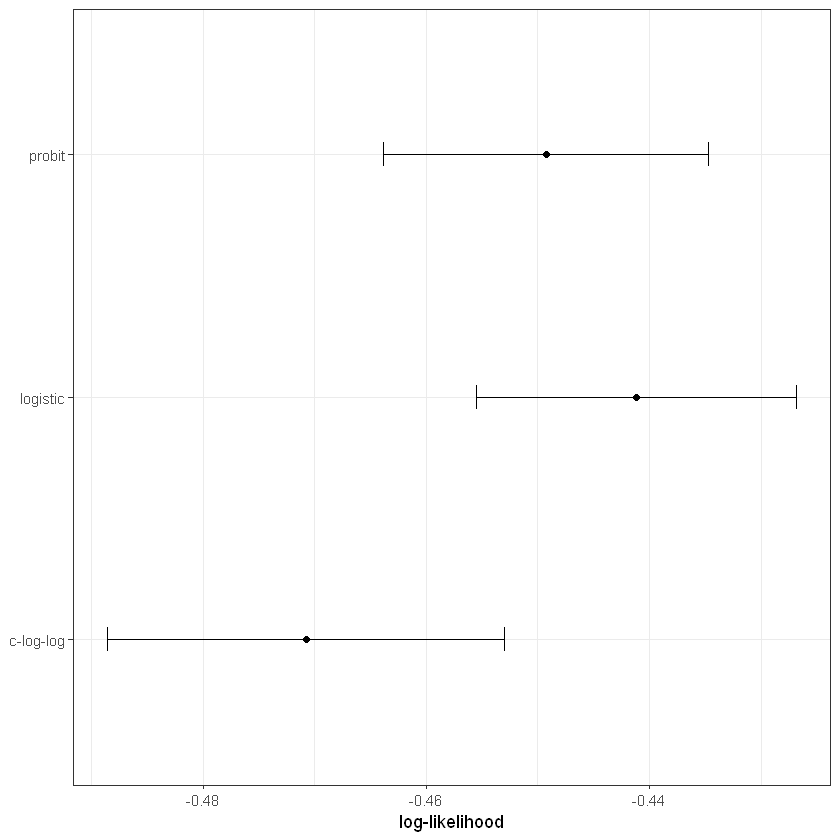

In [30]:
resampled_res %>% 
    filter(.metric == "mn_log_loss") %>% 
    ggplot(aes(x = mean, y = model)) + 
    geom_point() + 
    geom_errorbar(aes(xmin = mean - 1.64 * std_err, xmax = mean + 1.64 * std_err),
                width = .1) + 
    labs(y = NULL, x = "log-likelihood")

<br>

#### 측정항목에 따라, 하이퍼 파라미터 튜닝의 결정값이 달라질 수 있음

In [32]:
logit_pred <- logistic_reg() %>% 
    set_engine("glm") %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "logit")

In [33]:
probit_pred <- logistic_reg() %>% 
    set_engine("glm", family = binomial(link = "probit")) %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "probit")

In [34]:
cloglog_pred <- logistic_reg() %>% 
    set_engine("glm", family = binomial(link = "cloglog")) %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "c-log-log")

In [35]:
link_grids <- bind_rows(logit_pred, probit_pred, cloglog_pred) %>% 
    mutate(link = factor(link, levels = c("logit", "probit", "c-log-log")))

- 세 모델의 클래스 경계

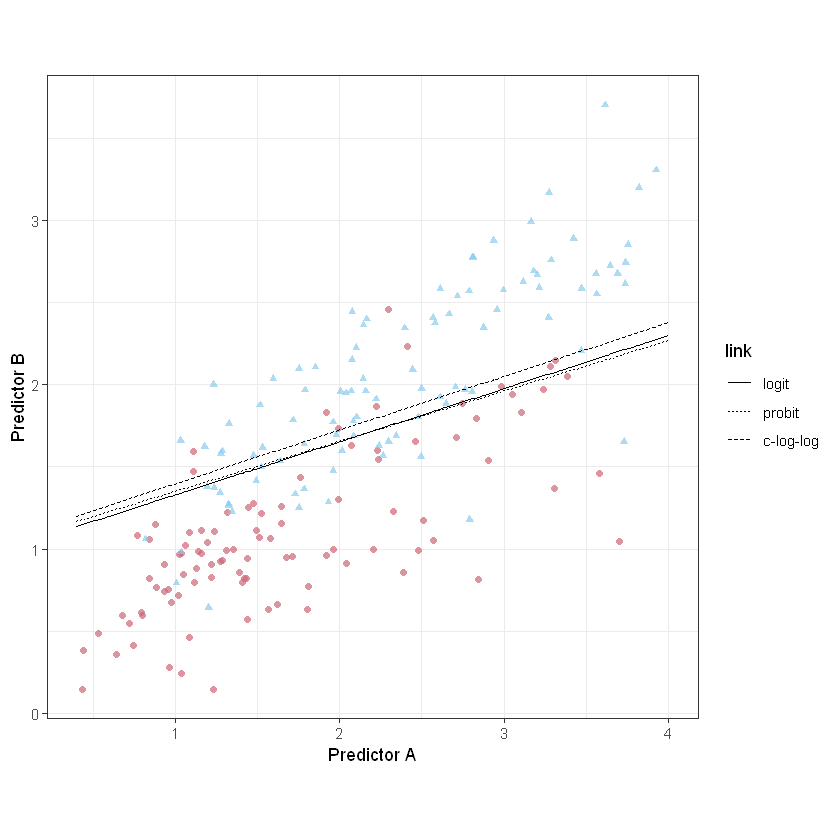

In [36]:
link_grids %>% 
    ggplot(aes(x = A, y = B)) + 
    geom_point(data = testing_set, aes(color = Class, pch = Class), 
             alpha = 0.7, show.legend = FALSE) + 
    geom_contour(aes( z = .pred_Class1, lty = link), breaks = 0.5, color = "black") + 
    scale_color_manual(values = c("#CC6677", "#88CCEE")) + 
    coord_equal() + 
    labs(x = "Predictor A", y = "Predictor B")

<br>

## 09.04. 잘못된 하이퍼 파라미터 튜닝
- 하이퍼 파라미터 튜닝은 모델 복잡성의 정도를 조절
- 복잡성이 높을수록 모델이 적합할 수 있는 패턴의 유연성이 높아지는 경우가 많음
    - 예를 들어, 스플라인 함수에 자유도를 추가하면, 예측 방정식의 복잡성이 증가
    
        이는 데이터가 복잡할 때 이점이 되는 반면, 새로운 데이터에서 낮은 성능을 보일 수 있음
        
        $\rightarrow$ **과적합은 모델이 훈련 데이터에 너무 많이 적응하는 상황**
        
        **모델을 구축하는 데 사용된 데이터에 대해서는 성능이 좋지만, 새 데이터에 대해서는 성능이 좋지 않음**

<br>

- **신경망 분류 모델에서 은닉층의 수가 더 많이 추가됨에 따라 훈련 데이터에 대한 모델의 효율성이 증가**
    
    **하지만, 훈련 데이터에서 보이는 패턴을 매우 과도하게 해석하기 시작**
    
    - 단일 은닉층 모델은 데이터에 유연하게 적응하지 못함
    - 4개의 은닉층 모델은 데이터의 주류에서 벗어난 값에 대한 비현실적인 경계로 인해 과적합의 징후를 보이기 시작
    - 20개의 은닉층 모델은 훈련 데이터를 기억하기 시작하여, 테스트 데이터에서 낮은 성능을 보임
    
<img src = 'https://www.tmwr.org/figures/two-class-boundaries-1.png'>

- 모델이 훈련 데이터에 과적합 되는 것을 감지하기 위해서는, 검증할 수 있는 많은 데이터가 필요

<br>

## 09.05. 하이퍼 파라미터 튜닝 전략
- 하이퍼 파라미터 튜닝은 일반적으로 그리드 서치와 반복 서치라는 두 가지 범주가 존재
- **그리드 서치는 튜닝할 파라미터 세트를 미리 정의하는 경우**
    - 그리드 서치와 관련된 주요 선택 사항은, 그리드를 만드는 방법과 평가할 파리머의 조합 수입니다. 
    - 그리드 서치는 파라미터 공간을 커버하는 데 필요한 그리드 포인트 수가
        
        차원의 저주로 인해 관리하기 어려워질 수 있기 때문에 종종 비효율적이라고 판단될 수 있음

- **반복 서치 또는 순차적 서치는 이전 결과를 기반으로 새로운 매개변수 조합을 순차적으로 발견하는 것**
    - 어떤 경우에는 최적화 프로세스를 시작하기 위해, 하나 이상의 파라미터 조합에 대한 초기 결과 세트가 필요

<br>

- 0과 1 사이의 범위에 있는 두 개의 파라미터가 있는 상황에 대한 두 가지 접근 방식 결과 
    - 각각의 등고선 세트는 파라미터와 결과 간의 실제(시뮬레이션된) 관계를 보여줌
    - **왼쪽은 공간 채우기 디자인 (Space Filling)이라는 그리드 유형**
        - 튜닝 파라미터 조합이 서로 가깝지 않도록 파라미터 공간을 커버하기 위해 고안된 실험 설계
        - 이 설계의 결과는 실제로 최적의 파라미터에 위치하지 못하나, 한 지점은 최적의 파라미터에 근접
    - **오른쪽은 전역 검색 방법인 Nelder-Mead 단순 방법**
        - 파라미터 공간의 최적 위치에 도달할 때 까지 공간을 가로질러 구불구불하게 이동하며, 최적의 위치에서 가능한 한 수치적으로 가장 좋은 값에 가까워지려고 시도
        - 이 검색방법은 효과적이지만 비효율적일 수도 있음. 특히 최적의 값 근처에서 더 많은 계산이 필요
    - 하이브리드 전략은 초기 그리드 서치 후 최적의 그리드 조합부터 순차적 최적화가 시작
    
<img src ='https://www.tmwr.org/figures/tuning-strategies-1.png'>

<br>

## 09.06. 성공적인 하이퍼 파라미터 튜닝
- 파라미터의 튜닝 세트는 모델의 엔진 (라이브러리)마다 상이
    - `ranger` 패키지에는 다른 패키지에서 사용되지 않는 일부 인수가 포함
        - `regularization.factor` : 설명변수 선택을 정규화하는 gain penalty 화, 앙상블에 사용되는 설명변수 수와 성능 간의 균형을 조절하는데 사용

```r
rand_forest(trees = 2000, min_n = 10) %>%                   # <- main arguments
  set_engine("ranger", regularization.factor = 0.5)         # <- engine-specific
```

<br>

### 튜닝 가능한 파라미터 

<br>

#### 모델 내 튜닝 파라미터 지정
* 신경망 모델의 은닉층을 조절하는 경우, `hidden_units` 파라미터를 `tune()`으로
    
    $\rightarrow$ 최적화를 위한 파라미터 태그 기정

In [39]:
neural_net_spec <- mlp(hidden_units = tune()) %>%
    set_mode("regression") %>%
    set_engine("keras")

<br>

#### 객체에 대한 튜닝 가능 파라미터 확인
#### `extract_parameter_set_dials()`

In [41]:
extract_parameter_set_dials(neural_net_spec)

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
hidden_units,hidden_units,model_spec,mlp,main,"integer , 1 , 10 , TRUE , TRUE , # Hidden Units"


<br>

#### **전처리에서의 튜닝 파라미터 지정**
- `step_other`의 기타 임곗값 (`threshold`)에 대한 튜닝 파라미터 지정
- `step_ns`의 차수 (`deg_free`)에 대한 튜닝 파라미터 지정

In [43]:
data(ames)
ames <- mutate(ames, Sale_Price = log10(Sale_Price))

set.seed(502)
ames_split <- initial_split(ames, prop = 0.80, strata = Sale_Price)
ames_train <- training(ames_split)
ames_test  <-  testing(ames_split)

In [44]:
ames_rec <- recipe(Sale_Price ~ Neighborhood + Gr_Liv_Area + Year_Built + Bldg_Type + Latitude + Longitude, data = ames_train)  %>%
    step_log(Gr_Liv_Area, base = 10) %>% 
    step_other(Neighborhood, threshold = tune()) %>% 
    step_dummy(all_nominal_predictors()) %>% 
    step_interact( ~ Gr_Liv_Area:starts_with("Bldg_Type_") ) %>% 
    step_ns(Longitude, deg_free = tune("longitude df")) %>% 
    step_ns(Latitude,  deg_free = tune("latitude df"))

In [45]:
recipes_param <- extract_parameter_set_dials(ames_rec)
recipes_param

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
threshold,threshold,recipe,step_other,other_Xe89S,"double , 0 , 0.1 , TRUE , TRUE , Threshold"
deg_free,longitude df,recipe,step_ns,ns_FRHb6,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"
deg_free,latitude df,recipe,step_ns,ns_xxQQr,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"


<br>

#### 워크플로 전체에 대한 튜닝 파라미터 확인

In [46]:
wflow_param <- workflow() %>%
    add_recipe(ames_rec) %>%
    add_model(neural_net_spec) %>%
    extract_parameter_set_dials()
wflow_param

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
hidden_units,hidden_units,model_spec,mlp,main,"integer , 1 , 10 , TRUE , TRUE , # Hidden Units"
threshold,threshold,recipe,step_other,other_Xe89S,"double , 0 , 0.1 , TRUE , TRUE , Threshold"
deg_free,longitude df,recipe,step_ns,ns_FRHb6,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"
deg_free,latitude df,recipe,step_ns,ns_xxQQr,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"


<br>

#### 각 파라미터에는, 튜닝 파라미터 지정을 위한 다이얼 함수가 존재

In [51]:
hidden_units()

# Hidden Units (quantitative)
Range: [1, 10]

In [52]:
threshold()

Threshold (quantitative)
Range: [0, 1]

In [53]:
spline_degree()

Spline Degrees of Freedom (quantitative)
Range: [1, 10]

In [70]:
regularization_factor()

Gain Penalization (quantitative)
Range: [0, 1]

In [71]:
penalty()

Amount of Regularization (quantitative)
Transformer: log-10 [1e-100, Inf]
Range (transformed scale): [-10, 0]

In [74]:
penalty(range = c(-1, 0)) 

Amount of Regularization (quantitative)
Transformer: log-10 [1e-100, Inf]
Range (transformed scale): [-1, 0]

In [73]:
penalty(trans = NULL, range = 10^c(-10, 0))

Amount of Regularization (quantitative)
Range: [1e-10, 1]

<br>

#### 특정 하이퍼 파라미터를 추출

In [54]:
wflow_param %>% extract_parameter_dials("threshold")

Threshold (quantitative)
Range: [0, 0.1]

- 파라미터 세트 내에서, 특정 파라미터의 범위를 업데이트

In [55]:
extract_parameter_set_dials(ames_rec) %>%
    update(threshold = threshold(c(0.8, 1.)))

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
threshold,threshold,recipe,step_other,other_Xe89S,"double , 0.8 , 1 , TRUE , TRUE , Threshold"
deg_free,longitude df,recipe,step_ns,ns_FRHb6,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"
deg_free,latitude df,recipe,step_ns,ns_xxQQr,"integer , 1 , 15 , TRUE , TRUE , Spline Degrees of Freedom"


<br>

### 합리적인 기본값 탐색
- 랜덤포레스트 모델의 `mtry` 파라미터는 설명변수의 수를 모르면, 파라미터의 범위를 설정할 수 없음

In [56]:
rf_spec <- rand_forest(mtry = tune()) %>% 
    set_engine("ranger", regularization.factor = tune("regularization")) %>%
    set_mode("regression")

In [58]:
rf_param <- extract_parameter_set_dials(rf_spec)
print(rf_param)

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[?]
 regularization regularization.factor nparam[+]

Model parameters needing finalization:
   # Randomly Selected Predictors ('mtry')

See `?dials::finalize` or `?dials::update.parameters` for more information.



In [64]:
rf_param %>% extract_parameter_dials("mtry")

# Randomly Selected Predictors (quantitative)
Range: [1, ?]

- 따라서 `update()`로 기본 범위를 직접 지정

In [60]:
rf_param %>% 
    update(mtry = mtry(c(1, 70))) %>% print()

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[+]
 regularization regularization.factor nparam[+]



- **데이터 전처리 단계에서 설명변수의 수가 추가되거나 감소되는 경우, `finalize()`함수로 다시 조정**

In [66]:
pca_rec <- recipe(Sale_Price ~ ., data = ames_train) %>% 
  step_normalize(contains("SF")) %>% 
  step_pca(contains("SF"), threshold = .95)

In [67]:
updated_param <- workflow() %>% 
    add_model(rf_spec) %>% 
    add_recipe(pca_rec) %>% 
    extract_parameter_set_dials() %>% 
    finalize(ames_train)

In [68]:
print(updated_param)

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[+]
 regularization regularization.factor nparam[+]



In [69]:
updated_param %>% extract_parameter_dials("mtry")

# Randomly Selected Predictors (quantitative)
Range: [1, 74]